In [1]:
%cd ..

c:\Code\Armband


In [2]:
import numpy as np
import pandas as pd
import random
import os
#import keras_tuner as kt
from scipy import signal
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as layers
from tensorflow.keras.layers import GlobalMaxPooling2D, Activation, Dense, Conv1D, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras import optimizers

%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras import regularizers



from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from utils.signal import DCFilter, normalize
from utils.visualize import showMe, showHistory, showAvg
from utils.augment import apply_augment


from utils.models.regression.conv2 import get_model

from utils.data import load_set, pre_process_set, format2train, shuffle
from utils.sampler_generator import SamplerGenerator

from utils.visualizer import Visualizer

%load_ext autoreload
%autoreload 2



from config.continous import settings

np.random.seed(42)
tf.keras.utils.set_random_seed(1)
#tf.config.experimental.enable_op_determinism()

Loading 9 sessions...
train_data\train\Ambrus\2022-10-13_13-25.npy
X_store shape: (8, 198438)
y_store shape: (2, 198438)
train_data\train\Ambrus\2022-10-13_13-32.npy
X_store shape: (8, 633797)
y_store shape: (2, 633797)
train_data\train\Erno\2022-10-13_14-01.npy
X_store shape: (8, 301710)
y_store shape: (2, 301710)
train_data\train\Nemes\2022-10-12_17-06.npy
X_store shape: (8, 501320)
y_store shape: (2, 501320)
train_data\train\Nemes\2022-10-13_12-47.npy
X_store shape: (8, 260303)
y_store shape: (2, 260303)
train_data\train\Peti\2022-10-13_16-14.npy
X_store shape: (8, 624009)
y_store shape: (2, 624009)
train_data\train\Szarvas\2022-10-14_11-42.npy
X_store shape: (8, 72926)
y_store shape: (2, 72926)
train_data\train\Szarvas\2022-10-14_11-45.npy
X_store shape: (8, 34744)
y_store shape: (2, 34744)
train_data\train\Szarvas\2022-10-14_11-46.npy
X_store shape: (8, 579079)
y_store shape: (2, 579079)
Loaded 9 sessions


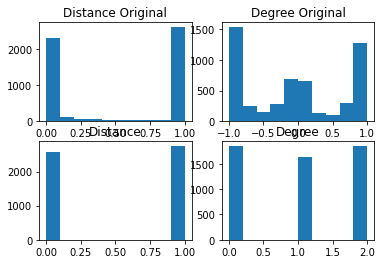

Dropped 134 samples. 5200 samples remaining
Loading 2 sessions...
train_data\val\Nemes\2022-10-12_17-26.npy
X_store shape: (8, 86280)
y_store shape: (2, 86280)
train_data\val\Peti\2022-10-13_16-37.npy
X_store shape: (8, 178757)
y_store shape: (2, 178757)
Loaded 2 sessions


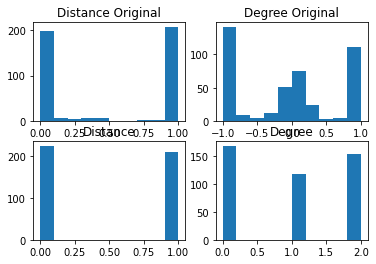

Dropped 38 samples. 400 samples remaining


In [3]:
end_label = True
train_generator = SamplerGenerator(settings, batch_size=settings['batch_size'], n_steps = 500, end_label=end_label)
val_generator = SamplerGenerator(settings, batch_size=settings['batch_size'], n_steps = 500, end_label=end_label, split = 'val')

In [124]:
#from utils.models.classification.dense import get_model
#from utils.models.classification.conv import get_model
#from utils.models.classification.rnn import get_model
#from utils.models.classification.lstm import get_model
#from utils.models.classification.gru import get_model
#from utils.models.classification.conv_rnn import get_model
from utils.models.classification.conv_lstm import get_model
#from utils.models.classification.conv_gru import get_model


model = get_model(end_label, settings['targets'])
model.outputs

Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 8, 1000)]    0           []                               
                                                                                                  
 tf.compat.v1.transpose_67 (TFO  (None, 1000, 8)     0           ['input[0][0]']                  
 pLambda)                                                                                         
                                                                                                  
 reshape_107 (Reshape)          (None, 1000, 8, 1)   0           ['tf.compat.v1.transpose_67[0][0]
                                                                 ']                               
                                                                                           

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'distance')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'degree')>]

In [125]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=30,
    decay_rate=0.98
    )
    



distance_loss = tf.keras.losses.BinaryCrossentropy(
    label_smoothing=0.005,
    name="distance_loss",
)
degree_loss = tf.keras.losses.SparseCategoricalCrossentropy(
    name = 'degree_loss'
)
lossWeights = {"distance": 1.0, "degree": 1.0}




# COMPARE OPTIMIZERS IN ARTICLE
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=opt,
          loss={'distance': distance_loss, 'degree' :degree_loss},
          loss_weights=lossWeights,
          #metrics=['mae','accuracy']
          metrics={'distance':'accuracy', 'degree': 'sparse_categorical_accuracy'}
         )

Epoch 1/100
26/26 [==============================] - 6s 169ms/step - loss: 1.8623 - distance_loss: 0.6920 - degree_loss: 1.0471 - distance_accuracy: 0.5152 - degree_sparse_categorical_accuracy: 0.3425 - val_loss: 1.7892 - val_distance_loss: 0.6862 - val_degree_loss: 0.9836 - val_distance_accuracy: 0.5350 - val_degree_sparse_categorical_accuracy: 0.4150
Epoch 2/100
26/26 [==============================] - 4s 154ms/step - loss: 1.7769 - distance_loss: 0.6845 - degree_loss: 0.9762 - distance_accuracy: 0.5463 - degree_sparse_categorical_accuracy: 0.5029 - val_loss: 1.6319 - val_distance_loss: 0.6519 - val_degree_loss: 0.8672 - val_distance_accuracy: 0.5800 - val_degree_sparse_categorical_accuracy: 0.5825
Epoch 3/100
26/26 [==============================] - 4s 153ms/step - loss: 1.6603 - distance_loss: 0.6764 - degree_loss: 0.8739 - distance_accuracy: 0.5313 - degree_sparse_categorical_accuracy: 0.5933 - val_loss: 1.4772 - val_distance_loss: 0.6332 - val_degree_loss: 0.7367 - val_distance_a

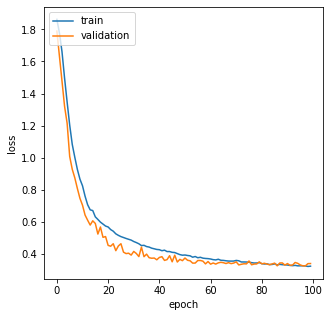

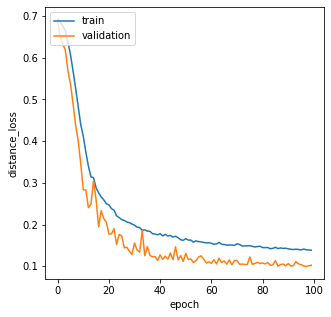

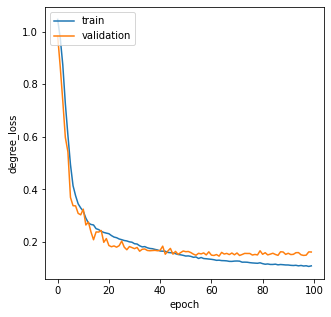

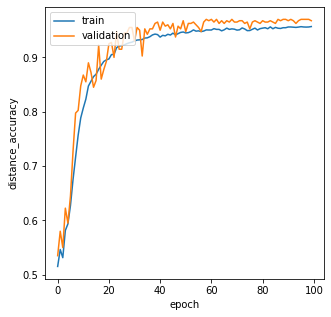

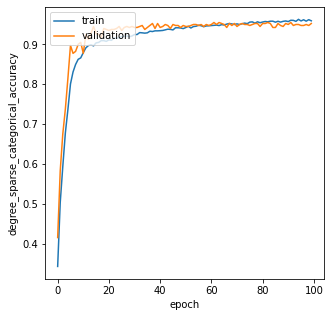

In [126]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    batch_size=settings['batch_size'],
                    epochs=100
                  )

showHistory(history)          

In [127]:
model.save('models/conv_lstm2')

INFO:tensorflow:Assets written to: models/conv_lstm2\assets


INFO:tensorflow:Assets written to: models/conv_lstm2\assets
